<a href="https://colab.research.google.com/github/HilbertN/Redes_Neuronales/blob/main/RN17_SeparableConv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data_augmentation**

**SeparableConv2D**

**BatchNormalization**

**GlobalAvaragePooling**

#SeparableConv2D

La convolución 2D estándar implica la aplicación de un núcleo (kernel) a una imagen de entrada para extraer características. La convolución separable 2D divide esta operación en dos etapas: una convolución de profundidad (depthwise convolution) y una convolución de punto (pointwise convolution). Aquí está cómo funciona:

Convolución de Profundidad (Depthwise Convolution): En esta etapa, se aplica una convolución separada para cada canal de entrada (profundidad) de la imagen. Esto significa que cada canal se convoluciona de manera independiente, y se utiliza un núcleo separado para cada canal. Esto reduce significativamente la cantidad de parámetros en comparación con una convolución 2D estándar.

Convolución de Punto (Pointwise Convolution): En esta etapa, se aplica una convolución 1x1 para combinar los resultados de la convolución de profundidad. Esto implica una capa convolucional con un kernel de tamaño 1x1 que se utiliza para mezclar las características extraídas de manera eficiente.

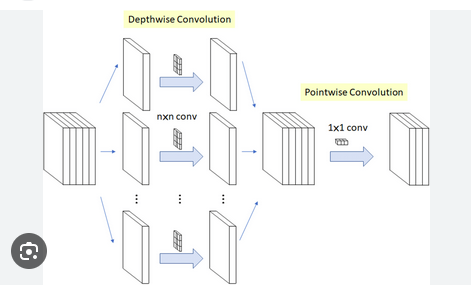

#Data_augmentation:

El aumento de datos es una técnica importante para mejorar el rendimiento y la capacidad de generalización de los modelos de aprendizaje automático, especialmente en problemas de visión por computadora, al aumentar la cantidad y la variabilidad de los datos de entrenamiento.


#BatchNormalization



# GlobalAvaragePooling

Después de pasar una imagen a través de una o varias capas convolucionales en una CNN, se obtiene un conjunto de mapas de características (feature maps) en las capas más profundas de la red.

En lugar de usar capas completamente conectadas (fully connected layers) o capas de aplanamiento (flattening) para conectar estas características a una capa de salida, se aplica Global Average Pooling.

En la operación de Global Average Pooling, se calcula el valor promedio de cada feature map. Básicamente, se suma todos los valores en un mapa de características y se divide por el número de elementos en ese mapa. Esto se hace para cada mapa de características por separado.

El resultado de esta operación de promedio global es un vector unidimensional con un valor promedio para cada feature map.

Este vector unidimensional se utiliza como entrada para las capas posteriores de la red neuronal, como las capas totalmente conectadas, y eventualmente para la capa de salida para realizar la clasificación.

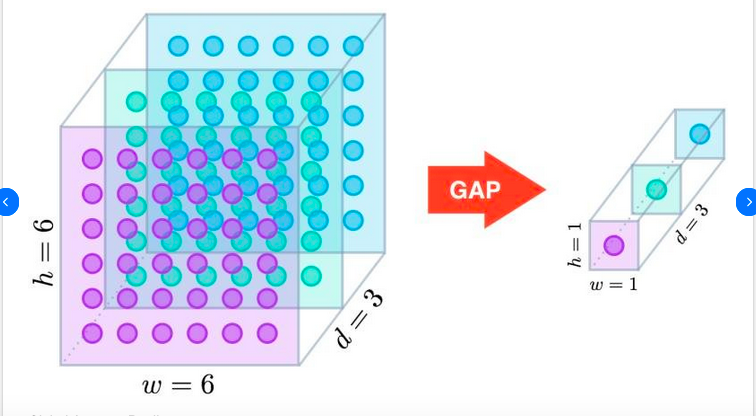

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
	[
		layers.RandomFlip("horizontal"),
		layers.RandomRotation(0.1),
		layers.RandomZoom(0.2),
	]
)
#¡No agrega nuevos datos!
#Esto permite que el modelo vea múltiples versiones de los mismos datos
#durante el entrenamiento, lo que puede ayudar a mejorar la generalización del modelo
#y a hacerlo más robusto ante diferentes variaciones en los datos de entrada.
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
	residual = x
	x = layers.BatchNormalization()(x)
	x = layers.Activation("relu")(x)
	x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
	x = layers.BatchNormalization()(x)
	x = layers.Activation("relu")(x)
	x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
	x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
	residual = layers.Conv2D(
	size, 1, strides=2, padding="same", use_bias=False)(residual)
	x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="sigmoid")(x)
x = layers.Dense(40)(x)
outputs = layers.Softmax()(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 180, 180, 3)          0         ['input_2[0][0]']             
                                                                                                  
 rescaling_1 (Rescaling)     (None, 180, 180, 3)          0         ['sequential_1[0][0]']        
                                                                                                  
 conv2d_6 (Conv2D)           (None, 176, 176, 32)         2400      ['rescaling_1[0][0]']         
                                                                                            